In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn as sl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
path = r"C:\Users\Δημήτρης\OneDrive\Έγγραφα\Giannis\MENG\semester8\Data Analysis\python_codes\Data Analysis_2024 1st Case_Data.csv"
df1 = pd.read_csv(path, index_col=False)
exr    = [2001, 2014]
exc     = ['Country', 'Status']
# df2 = df1.drop(columns = exc)

cond1, cond2 = df1['Year'] == exr[0], df1['Year'] == exr[1]
columns_to_select = ['Hepatitis B', 'Polio', 'Diphtheria ']
df2 = df1[columns_to_select]
df  = df2[~cond1]
df  = df[~cond2]


C:\Users\Δημήτρης\AppData\Local\Temp\ipykernel_18588\3994409346.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df  = df[~cond2]


Clustering with K = 3

In [4]:
# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the data to the KMeans model
kmeans.fit(df)

# Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Print the labels and centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

Cluster Labels: [2 2 2 ... 0 2 1]
Cluster Centers: [[38.05769231 47.80769231 16.16346154]
 [92.09099901 93.21859545 93.28288823]
 [53.5578635  65.43026706 77.48071217]]


Clustering with K = 4

In [5]:
# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the data to the KMeans model
kmeans.fit(df)

# Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Print the labels and centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

Cluster Labels: [3 1 1 ... 2 1 1]
Cluster Centers: [[93.51434879 94.50441501 94.54304636]
 [69.77477477 77.49249249 73.81681682]
 [16.12751678 62.02684564 50.55704698]
 [74.203125    9.34375    67.671875  ]]


In [7]:
# Define range of k values to try
k_values = range(2, 30)

# Calculate WCSS for each value of k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)



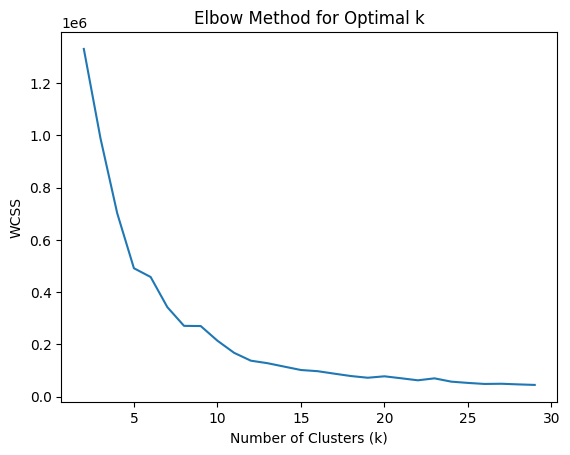

In [17]:
index = k_values.index(8)
plt.plot(k_values, wcss)
#plt.scatter(8, wcss[index], color='red', s=50)  # s is the size of points
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

Complete linkage

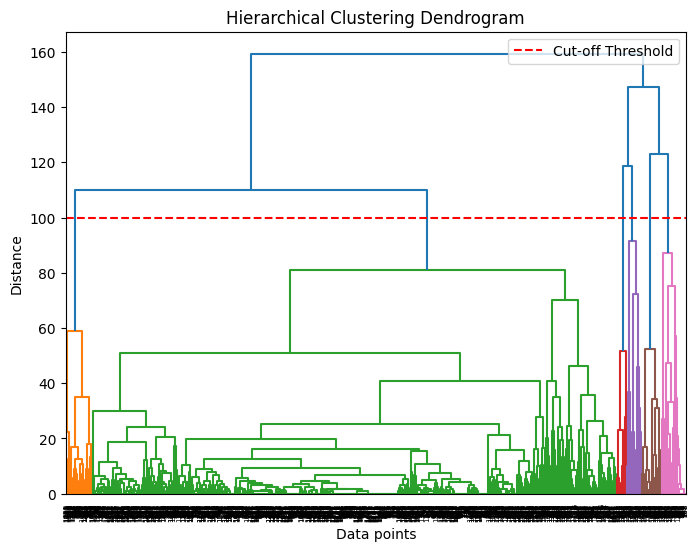

In [29]:
# Perform hierarchical clustering
#Z = linkage(df1, method='single')
Z = linkage(df, method='complete')
#Z = linkage(df1, method='average')
#Z = linkage(df1, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dend = dendrogram(Z, color_threshold= 100)
x_min, x_max = plt.xlim()
height = 100  # Example height
plt.axhline(y=height, color='r', linestyle='--', label='Cut-off Threshold')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.legend()
plt.show()

In [32]:
unique_colors = set(dend['color_list'])
optimal_num = len(unique_colors) - 1
print(optimal_num)


6


Single linkage

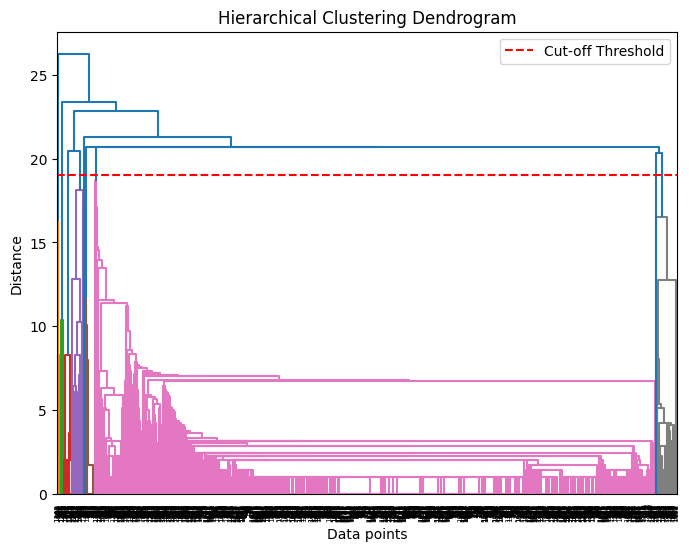

In [30]:
# Perform hierarchical clustering
Z2 = linkage(df, method='single')
# Z = linkage(df, method='complete')
#Z = linkage(df1, method='average')
#Z = linkage(df1, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dend2 = dendrogram(Z2, color_threshold= 19)
x_min, x_max = plt.xlim()
height = 19  # Example height
plt.axhline(y=height, color='r', linestyle='--', label='Cut-off Threshold')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.legend()
plt.show()

In [31]:
unique_colors = set(dend2['color_list'])
optimal_num = len(unique_colors) - 1
print(optimal_num)

7
